170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.2696 - loss: 2.0470 - val_accuracy: 0.4896 - val_loss: 1.5508
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4272 - loss: 1.6566 - val_accuracy: 0.5214 - val_loss: 1.4557
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4628 - loss: 1.5706 - val_accuracy: 0.5636 - val_loss: 1.3552
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4957 - loss: 1.5115 - val_accuracy: 0.5724 - val_loss: 1.3181
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5146 - loss: 1.4660 - val_accuracy: 0.5880 - val_loss: 1.3147
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5305 - loss: 1.4272 - val_accuracy: 0.6052 - val_loss: 1.2581
Epoch 7/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5527 - loss: 1.3931 - val_accuracy: 0.6272 - val_loss: 1.2093
Epoch 8/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5560 - loss: 1.3828 - val_accuracy: 

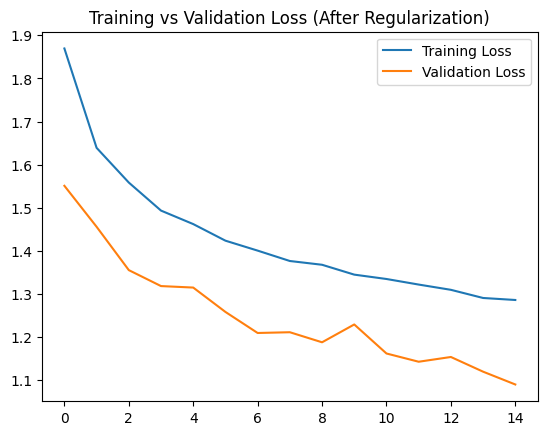

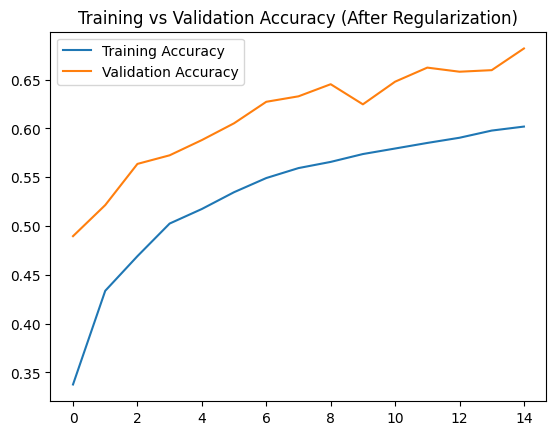

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Load CIFAR-10 dataset
(train_X, train_Y), (test_X, test_Y) = keras.datasets.cifar10.load_data()

# Normalize the dataset
train_X, test_X = train_X / 255.0, test_X / 255.0

# One-hot encode the labels
train_Y_one_hot = keras.utils.to_categorical(train_Y, 10)
test_Y_one_hot = keras.utils.to_categorical(test_Y, 10)

# Split validation set from training data
val_X, val_Y = train_X[45000:], train_Y_one_hot[45000:]
train_X, train_Y = train_X[:45000], train_Y_one_hot[:45000]

# Define CNN model with Regularization
model = keras.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_X, train_Y, epochs=15, batch_size=64, validation_data=(val_X, val_Y))

# Evaluate model on test data
y_pred = model.predict(test_X)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_Y_one_hot, axis=1)

# Compute Precision, Recall, F1-score
report = classification_report(y_true_classes, y_pred_classes, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

# Print final scores
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss (After Regularization)")
plt.show()

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy (After Regularization)")
plt.show()
